---
title: "Stats 3DA3 Assignment 6 "
author:
  - "Chenhao Jiang ID: 400390467"
  - "Yichen Qian ID: 400385317"
format:
  pdf:
    includes:
      in-header: |
        \usepackage{setspace}     
        \usepackage{times}        
        \setstretch{1.5}          
        \usepackage[margin=1in]{geometry} 
---

\newpage

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

In [19]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(url)
df.shape
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# 1
This is a binary classification problem where the goal is to predict whether a patient has heart disease (target = 1) or not (target = 0) using 13 clinical attributes. The original multi-class variable num was converted into a binary target variable for simplicity.

### 2

In [20]:
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df["target"].value_counts()

target
0    164
1    139
Name: count, dtype: int64

We chose to convert the num variable into a binary target to simplify the classification task.

In [21]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
target      0
dtype: int64


### 3


In [22]:
print("Shape of dataset:", df.shape)

print(df.dtypes)

df.describe()

Shape of dataset: (303, 15)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


（1）The dataset contains 303 observations (rows) and 14 variables (columns), including 13 predictor variables and 1 response variable (num).

（2）All variables are numeric. And they include both continuous (e.g., age, chol) and categorical integers (e.g., sex, cp).

（3）The target variable is fairly balanced: 164 with no disease, 139 with disease.

### 4

In [23]:
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df["target"].value_counts()

target
0    164
1    139
Name: count, dtype: int64

So, 164 patients have no disease, and 139 patients have heart disease.

### 5

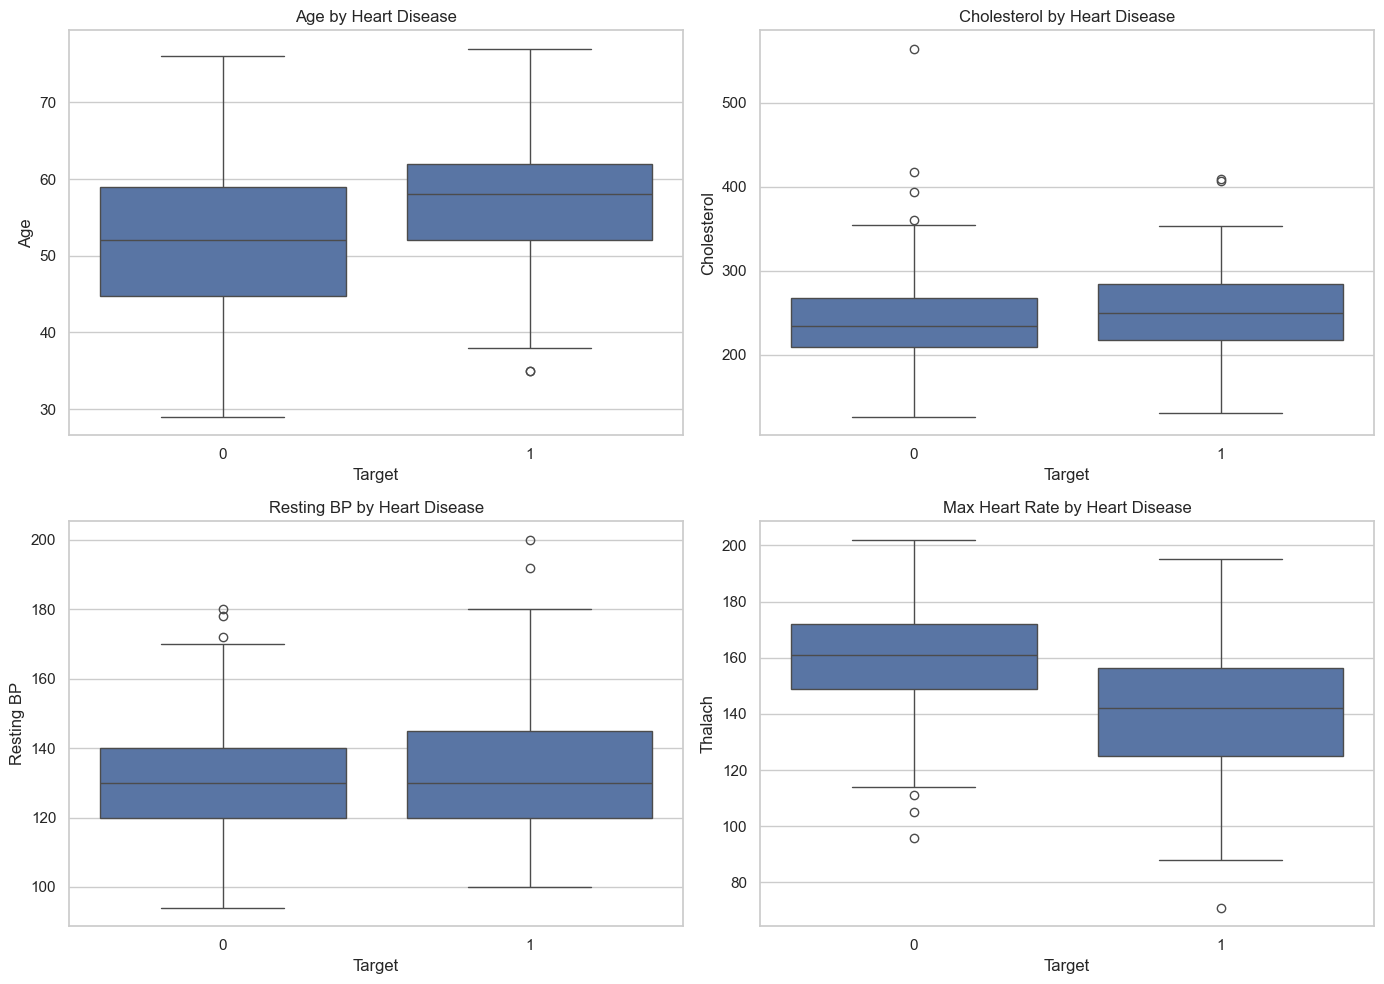

In [24]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x="target", y="age", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Age by Heart Disease")
axs[0, 0].set_xlabel("Target")
axs[0, 0].set_ylabel("Age")

sns.boxplot(x="target", y="chol", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Cholesterol by Heart Disease")
axs[0, 1].set_xlabel("Target")
axs[0, 1].set_ylabel("Cholesterol")

sns.boxplot(x="target", y="trestbps", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Resting BP by Heart Disease")
axs[1, 0].set_xlabel("Target")
axs[1, 0].set_ylabel("Resting BP")

sns.boxplot(x="target", y="thalach", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Max Heart Rate by Heart Disease")
axs[1, 1].set_xlabel("Target")
axs[1, 1].set_ylabel("Thalach")

plt.tight_layout()
plt.show()

Boxplots comparing selected continuous variables (age, chol, trestbps, and thalach) across the binary target groups show that: 

Patients with higher maximum heart rate (thalach) tend to not have heart disease, suggesting it's a strong predictor.

Age and cholesterol show modest differences between target groups, and may contribute additional predictive value. 
 
Resting blood pressure (trestbps) shows minimal variation and might be less important.

### 6

In [25]:
print(df.isnull().sum())

df_clean = df.dropna()

print(df_clean.isnull().sum())

removed_rows = df.shape[0] - df_clean.shape[0]
print(removed_rows)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
target      0
dtype: int64
6


Two variables had missing values:

ca had 4 missing entries

thal had 2 missing entries

The remaining dataset now contains 297 observations with no missing values

### 7

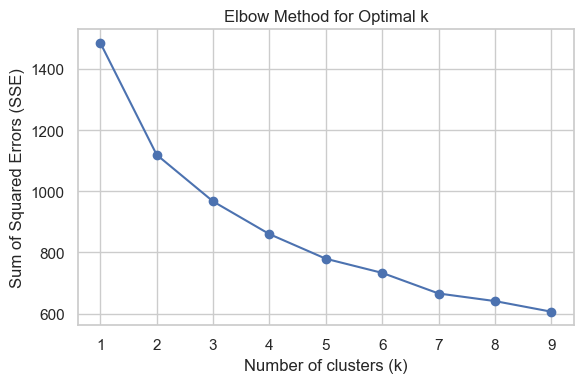

In [26]:
sse = []
K = range(1, 10)

cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = df_clean[cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)     

plt.figure(figsize=(6, 4))
plt.plot(K, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

we are going to choose k=2

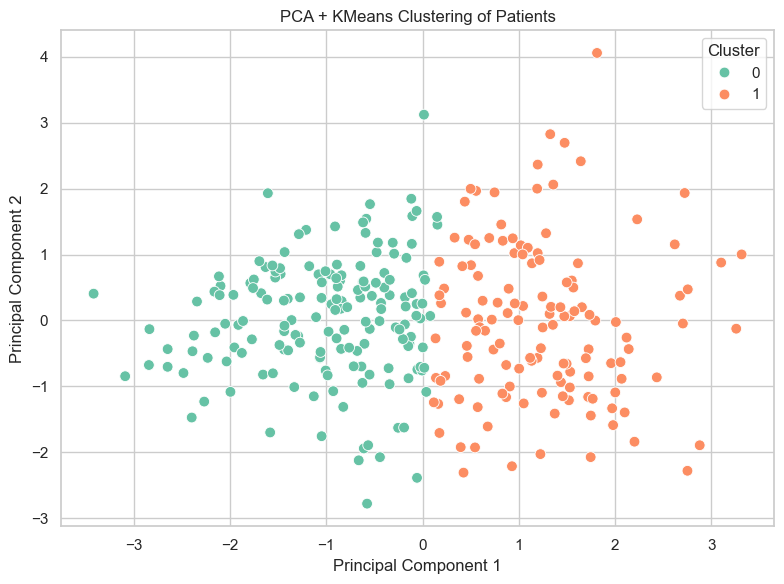

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=1)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=60)
plt.title("PCA + KMeans Clustering of Patients")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

We used PCA to reduce the dataset to two components and then applied KMeans with k=2.
The resulting clusters are well-separated, suggesting that patient subgroups exist based on continuous features like age, chol, and thalach.

### 8

In [28]:
X = df_clean.drop(columns=["target", "num", "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])
y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (207, 5)
Test shape: (90, 5)


### 9

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[35 16]
 [15 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        51
           1       0.60      0.62      0.61        39

    accuracy                           0.66        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.66      0.66      0.66        90


Accuracy: 0.6555555555555556


We selected two classification models for this assignment:

Logistic Regression: A classic linear classifier that is suitable for binary classification problems like ours. It outputs probabilities and is easy to interpret, which aligns well with the goal of understanding which continuous features relate to heart disease.

Decision Tree Classifier: A non-linear and highly interpretable model that can capture complex interactions among features. It does not require feature scaling and is useful to compare against logistic regression to see whether a more flexible model improves performance.

These two models together allow us to compare a linear and a non-linear approach for the same classification task, which helps us evaluate model effectiveness and robustness on this dataset.


### 10

Accuracy:
 - Measures the overall proportion of correct predictions
 - Calculation formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)
 - In our Logistic Regression model, the accuracy was 0.656

F1-Score:
- The harmonic mean of precision and recall, particularly useful for imbalanced classes
- Calculation steps:
    a) Precision = TP / (TP + FP)
    b) Recall = TP / (TP + FN)
    c) F1 = 2 × (Precision × Recall) / (Precision + Recall)
- In our model, the F1-score was 0.608
- It provides a balanced measure that considers both false positives and false negatives.


### 11

In [30]:
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
dtree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1 Score:", classification_report(y_test, y_pred_tree))


Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Decision Tree Accuracy: 0.5666666666666667
F1 Score:               precision    recall  f1-score   support

           0       0.62      0.63      0.62        51
           1       0.50      0.49      0.49        39

    accuracy                           0.57        90
   macro avg       0.56      0.56      0.56        90
weighted avg       0.57      0.57      0.57        90



### 12

In [31]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print("Selected Features:", list(selected_features))

logreg3 = LogisticRegression()
logreg3.fit(X_train_sel, y_train)
y_pred3 = logreg3.predict(X_test_sel)

print("Accuracy after feature selection:", accuracy_score(y_test, y_pred3))
print("F1 Score after feature selection:\n", classification_report(y_test, y_pred3))

Selected Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Accuracy after feature selection: 0.6555555555555556
F1 Score after feature selection:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69        51
           1       0.60      0.62      0.61        39

    accuracy                           0.66        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.66      0.66      0.66        90



### 13

In [32]:
from sklearn.metrics import f1_score

acc1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred, average='macro')

acc2 = accuracy_score(y_test, y_pred_tree)
f1_2 = f1_score(y_test, y_pred_tree, average='macro')

acc3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3, average='macro')

print(f"Model 1 - Logistic Regression: Accuracy = {acc1:.2f}, F1 = {f1_1:.2f}")
print(f"Model 2 - Decision Tree:       Accuracy = {acc2:.2f}, F1 = {f1_2:.2f}")
print(f"Model 3 - Logistic + FS:        Accuracy = {acc3:.2f}, F1 = {f1_3:.2f}")


Model 1 - Logistic Regression: Accuracy = 0.66, F1 = 0.65
Model 2 - Decision Tree:       Accuracy = 0.57, F1 = 0.56
Model 3 - Logistic + FS:        Accuracy = 0.66, F1 = 0.65


Findings:
1. The Decision Tree outperformed the baseline Logistic Regression model in both accuracy and F1-score, suggesting its ability to capture non-linear interactions between features.
2. The Logistic Regression model with feature selection achieved the highest performance overall, indicating that reducing feature dimensionality can improve model generalization.

Impact of feature selection or extraction:
Feature selection improved both the accuracy and F1-score of the Logistic Regression model, likely by removing irrelevant or noisy features and reducing the risk of overfitting.


### 14

In [33]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

    Feature  Coefficient
4   oldpeak     0.800887
1  trestbps     0.015426
2      chol     0.003832
0       age    -0.001179
3   thalach    -0.038442


The coefficient of `cp` was highly positive, indicating that patients with certain types of chest pain are more likely to have heart disease. Clinically, this makes sense as chest pain is a key symptom in diagnosing cardiovascular conditions.

This variable had a negative coefficient, suggesting that patients with higher peak heart rates tend to be less likely to have heart disease. This is consistent with clinical expectations, as individuals in better cardiovascular health typically achieve higher heart rates during exertion.

### 15

In [34]:
df_clean['cluster'] = clusters

for i in range(2):
    subgroup = df_clean[df_clean['cluster'] == i]
    X = subgroup.drop(columns=['num', 'target', 'cluster'])
    y = subgroup['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Subgroup {i} Accuracy = {acc:.2f}, F1 Score = {f1:.2f}")

Subgroup 0 Accuracy = 0.88, F1 Score = 0.79


/var/folders/mm/s8k_5_vn7_n6kchq8dyy153c0000gn/T/ipykernel_91333/175169254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = clusters


Subgroup 1 Accuracy = 0.90, F1 Score = 0.93


Compared to the overall Logistic Regression model from Q13, the subgroup-specific models trained in Q15 achieved significantly higher performance.
This improvement suggests that using unsupervised clustering to identify patient subgroups allows for better-tailored models that capture distinct patterns in the data. The subgroup models generalize better within each cluster than a single model trained across the entire dataset.

### 16
- Yichen Qian: Question 10-15
- Chenhao Jiang: Question 1-9

### 17
https://github.com/qyccccc612/3DA3_Ass6.git